<a href="https://colab.research.google.com/github/vimalkumarasamy/computer_vision/blob/master/Panorama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
cd '/content/gdrive/My Drive/Computer_Vision/panorama'

/content/gdrive/My Drive/Computer_Vision/panorama


In [0]:
import os
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np
# ! pip uninstall opencv python
# ! pip install opencv-python==3.4.2.17
# ! pip install opencv-contrib-python==3.4.2.17

In [0]:
def ssd(arr1,arr2):
  import numpy as np
  return np.sum(np.square(arr1-arr2))

In [0]:
def match_keypoints(des_1,des_2):
  ratios=[]
  matches=[]
  for i in range(len(des_2)):
    arr=[]
    for j in range(len(des_1)):
      arr=arr+[ssd(des_2[i],des_1[j])]
    arr=np.array(arr)
    ind=arr.argsort()[0:2]
    ind1,ind2=ind[0],ind[1]
    val1,val2=arr[ind1],arr[ind2]
    ratio=val1/val2
    ratios=ratios+[ratio]
    matches=matches+[ind1] 
  top5=np.array(ratios).argsort()[0:10]
  best_match=[]
  for i in top5:
    best_match=best_match+[[i,matches[i]]]
  return(best_match)

In [118]:
img_1 = cv2.imread(os.getcwd()+'/photos/'+files[0],0)
img_2 = cv2.imread(os.getcwd()+'/photos/'+files[2],0)

# pass gray scale images for computing homography 
def find_homography(img_1,img_2):
  sift = cv2.xfeatures2d.SIFT_create()
  kp_1,des_1 = sift.detectAndCompute(img_1,None)
  kp_2,des_2 = sift.detectAndCompute(img_2,None)
  l1,b1=img_1.shape
  l2,b2=img_2.shape

  coords=match_keypoints(des_1,des_2)

  R,L,R_final,L_final=[],[],[],[]
  for i in coords:
    R.append(kp_2[i[0]].pt)
    L.append(kp_1[i[1]].pt)
  for i in range(len(R)):
    if len(R_final)<5:
      if R[i] not in R_final and L[i] not in L_final:
        R_final.append(R[i])
        L_final.append(L[i])
  L,R=L_final,R_final

  x1_=R[0][0]
  y1_=R[0][1]
  x2_=R[1][0]
  y2_=R[1][1]
  x3_=R[2][0]
  y3_=R[2][1]
  x4_=R[3][0]
  y4_=R[3][1]
  x1 =L[0][0]
  y1 =L[0][1]
  x2 =L[1][0]
  y2 =L[1][1]
  x3 =L[2][0]
  y3 =L[2][1]
  x4 =L[3][0]
  y4 =L[3][1]

  PH=np.array([[-x1,-y1,-1,0,0,0,(x1*x1_),(y1*x1_),(x1_)], [0,0,0,-x1,-y1,-1,(x1*y1_),(y1*y1_),y1_],[-x2,-y2,-1,0,0,0,(x2*x2_),(y2*x2_),x2_],[0,0,0,-x2,-y2,-1,(x2*y2_),(y2*y2_),y2_],
              [-x3,-y3,-1,0,0,0,(x3*x3_),(y3*x3_),x3_],[0,0,0,-x3,-y3,-1,(x3*y3_),(y3*y3_),y3_],[-x4,-y4,-1,0,0,0,(x4*x4_),(y4*x4_),x4_],[0,0,0,-x4,-y4,-1,(x4*y4_),(y4*y4_),y4_],[0,0,0,0,0,0,0,0,1]])
  Y=np.array([[0,0,0,0,0,0,0,0,1]])
  PH_inv = np.linalg.pinv(PH)
  H=np.matmul(np.linalg.pinv(PH),np.transpose(Y))
  Homograph=np.array([[H[0][0],H[1][0],H[2][0]],[H[3][0],H[4][0],H[5][0]],[H[6][0],H[7][0],H[8][0]]])
  H_=np.linalg.inv(Homograph)
  return(H_)

H=find_homography(img_1,img_2)
print(H)

[[ 6.23032315e-01  3.55133325e-02  1.19385461e+03]
 [-9.96766026e-02  7.91393741e-01  1.04138697e+02]
 [-6.63774755e-05  2.38323334e-06  8.75090899e-01]]


Left image


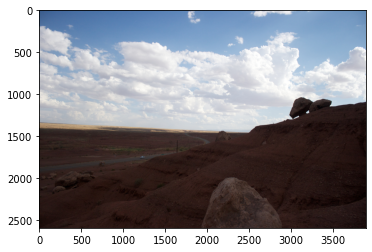

Right image Raw


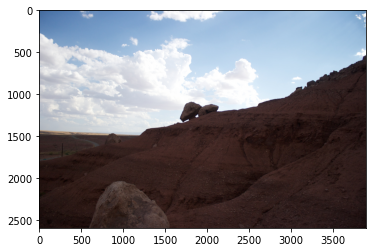

Right image Warped


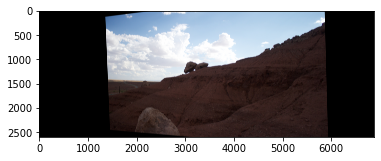

In [120]:
print("Left image")
img_1=cv2.imread(os.getcwd()+'/photos/'+files[0])[:,:,::-1]
plt.imshow(img_1)
plt.show()
print("Right image Raw")
img_2=cv2.imread(os.getcwd()+'/photos/'+files[2])[:,:,::-1]
plt.imshow(img_2)
plt.show()
print("Right image Warped")
out = cv2.warpPerspective(img_2, H, (b2+3000,l2))
plt.imshow(out)
plt.show()
